In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn

12:12:08|NIDN-INFO| Initialized NIDN for cpu
12:12:08|NIDN-INFO| Using double precision


Physical wavelengths are (in meters):
[7.00000000e-07 6.83464567e-07 6.67692308e-07 6.52631579e-07
 6.38235294e-07 6.24460432e-07 6.11267606e-07 5.98620690e-07
 5.86486486e-07 5.74834437e-07 5.63636364e-07 5.52866242e-07
 5.42500000e-07 5.32515337e-07 5.22891566e-07 5.13609467e-07
 5.04651163e-07 4.96000000e-07 4.87640449e-07 4.79558011e-07
 4.71739130e-07 4.64171123e-07 4.56842105e-07 4.49740933e-07
 4.42857143e-07 4.36180905e-07 4.29702970e-07 4.23414634e-07
 4.17307692e-07 4.11374408e-07 4.05607477e-07 4.00000000e-07]


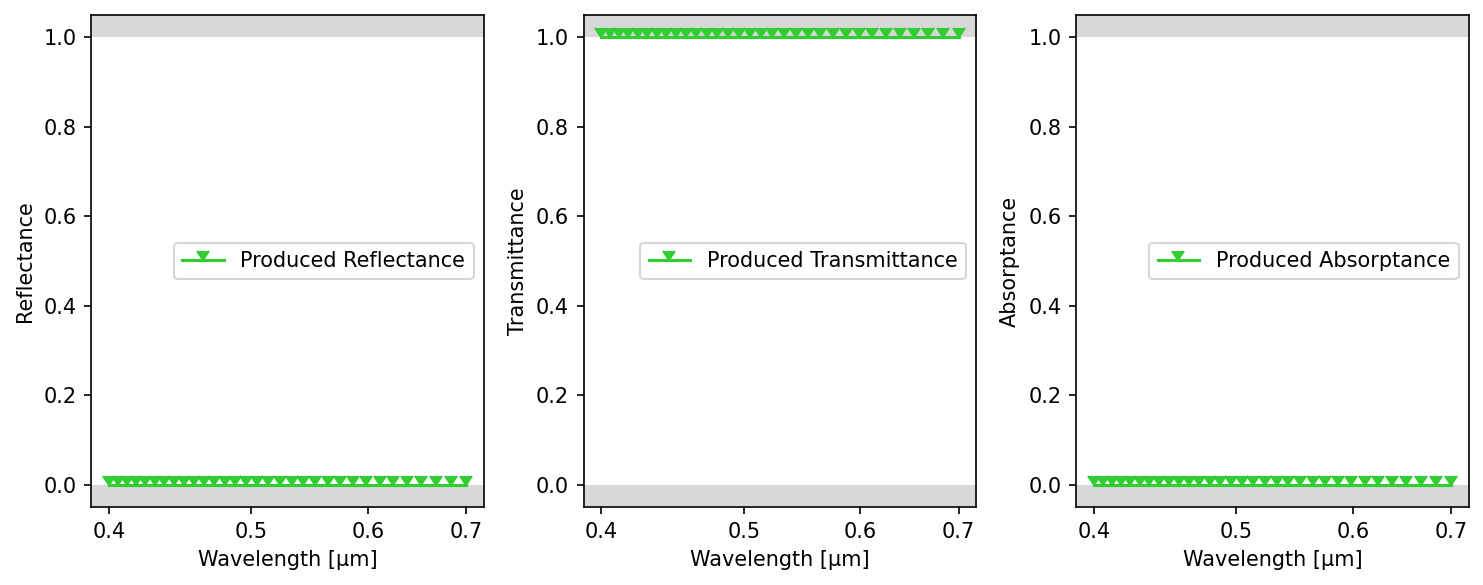

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 0.4e-6
cfg.physical_wavelength_range[1] = 0.7e-6
cfg.PER_LAYER_THICKNESS = [0.1]
cfg.TRCWA_BOTTOM_LAYER_EPS = 16.0
cfg.TRCWA_L_grid = [[1.0,0.],[0.,1.0]] 

# Let's investigate 32 frequency points
cfg.N_freq = 32

# Currently, the target spectra is set manually as a list of numbers 
cfg.target_reflectance_spectrum =   32*[0.0]
cfg.target_transmittance_spectrum = 32*[1.0]
# Since R + T + A = 1, we only need to give the reflectance and transmittance (absorptance is implicit)

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 8 # Choose number of layers

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 3.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 3000 # Set number of training iterations (that is forward model evaluations) to perform

In [4]:
#Show all used settings
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.0            |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [5]:
nidn.run_training(cfg);

12:12:14|NIDN-INFO| ###  New Best=0.6484 with SpectrumLoss=0.6484 ### L1=0.6484
12:12:14|NIDN-INFO| It=0     Loss=0.6484   |  weighted_avg=0.6484  |  SpectrumLoss=0.6484 | L1=0.6484
12:12:15|NIDN-INFO| ###  New Best=0.6121 with SpectrumLoss=0.6121 ### L1=0.6121
12:12:16|NIDN-INFO| ###  New Best=0.6022 with SpectrumLoss=0.6022 ### L1=0.6022
12:12:17|NIDN-INFO| ###  New Best=0.5894 with SpectrumLoss=0.5894 ### L1=0.5894
12:12:18|NIDN-INFO| ###  New Best=0.5752 with SpectrumLoss=0.5752 ### L1=0.5752
12:12:20|NIDN-INFO| ###  New Best=0.5639 with SpectrumLoss=0.5639 ### L1=0.5639
12:12:20|NIDN-INFO| It=5     Loss=0.5639   |  weighted_avg=0.5985  |  SpectrumLoss=0.5639 | L1=0.5639
12:12:21|NIDN-INFO| ###  New Best=0.5573 with SpectrumLoss=0.5573 ### L1=0.5573
12:12:22|NIDN-INFO| ###  New Best=0.5495 with SpectrumLoss=0.5495 ### L1=0.5495
12:12:23|NIDN-INFO| ###  New Best=0.5424 with SpectrumLoss=0.5424 ### L1=0.5424
12:12:24|NIDN-INFO| ###  New Best=0.5375 with SpectrumLoss=0.5375 ### L1=0.5

12:13:33|NIDN-INFO| ###  New Best=0.1886 with SpectrumLoss=0.1886 ### L1=0.1886
12:13:34|NIDN-INFO| ###  New Best=0.1862 with SpectrumLoss=0.1862 ### L1=0.1862
12:13:36|NIDN-INFO| ###  New Best=0.1734 with SpectrumLoss=0.1734 ### L1=0.1734
12:13:36|NIDN-INFO| It=65    Loss=0.1734   |  weighted_avg=0.2598  |  SpectrumLoss=0.1734 | L1=0.1734
12:13:38|NIDN-INFO| ###  New Best=0.1712 with SpectrumLoss=0.1712 ### L1=0.1712
12:13:39|NIDN-INFO| ###  New Best=0.1598 with SpectrumLoss=0.1598 ### L1=0.1598
12:13:40|NIDN-INFO| ###  New Best=0.1565 with SpectrumLoss=0.1565 ### L1=0.1565
12:13:42|NIDN-INFO| ###  New Best=0.1469 with SpectrumLoss=0.1469 ### L1=0.1469
12:13:43|NIDN-INFO| ###  New Best=0.1438 with SpectrumLoss=0.1438 ### L1=0.1438
12:13:43|NIDN-INFO| It=70    Loss=0.1438   |  weighted_avg=0.2164  |  SpectrumLoss=0.1438 | L1=0.1438
12:13:44|NIDN-INFO| ###  New Best=0.1351 with SpectrumLoss=0.1351 ### L1=0.1351
12:13:46|NIDN-INFO| ###  New Best=0.1315 with SpectrumLoss=0.1315 ### L1=0.1

12:15:22|NIDN-INFO| ###  New Best=0.0256 with SpectrumLoss=0.0256 ### L1=0.0256
12:15:24|NIDN-INFO| ###  New Best=0.0251 with SpectrumLoss=0.0251 ### L1=0.0251
12:15:25|NIDN-INFO| ###  New Best=0.0246 with SpectrumLoss=0.0246 ### L1=0.0246
12:15:25|NIDN-INFO| It=145   Loss=0.0246   |  weighted_avg=0.0284  |  SpectrumLoss=0.0246 | L1=0.0246
12:15:26|NIDN-INFO| ###  New Best=0.0244 with SpectrumLoss=0.0244 ### L1=0.0244
12:15:28|NIDN-INFO| ###  New Best=0.0240 with SpectrumLoss=0.0240 ### L1=0.0240
12:15:29|NIDN-INFO| ###  New Best=0.0238 with SpectrumLoss=0.0238 ### L1=0.0238
12:15:30|NIDN-INFO| ###  New Best=0.0236 with SpectrumLoss=0.0236 ### L1=0.0236
12:15:32|NIDN-INFO| ###  New Best=0.0234 with SpectrumLoss=0.0234 ### L1=0.0234
12:15:32|NIDN-INFO| It=150   Loss=0.0234   |  weighted_avg=0.0264  |  SpectrumLoss=0.0234 | L1=0.0234
12:15:33|NIDN-INFO| ###  New Best=0.0233 with SpectrumLoss=0.0233 ### L1=0.0233
12:15:39|NIDN-INFO| It=155   Loss=0.0247   |  weighted_avg=0.0251  |  Spectr

12:18:38|NIDN-INFO| It=290   Loss=0.0149   |  weighted_avg=0.0115  |  SpectrumLoss=0.0149 | L1=0.0149
12:18:45|NIDN-INFO| It=295   Loss=0.0135   |  weighted_avg=0.0117  |  SpectrumLoss=0.0135 | L1=0.0135
12:18:52|NIDN-INFO| It=300   Loss=0.0123   |  weighted_avg=0.0119  |  SpectrumLoss=0.0123 | L1=0.0123
12:18:55|NIDN-INFO| ###  New Best=0.0102 with SpectrumLoss=0.0102 ### L1=0.0102
12:18:56|NIDN-INFO| ###  New Best=0.0098 with SpectrumLoss=0.0098 ### L1=0.0098
12:18:58|NIDN-INFO| It=305   Loss=0.0107   |  weighted_avg=0.0120  |  SpectrumLoss=0.0107 | L1=0.0107
12:19:05|NIDN-INFO| It=310   Loss=0.0103   |  weighted_avg=0.0112  |  SpectrumLoss=0.0103 | L1=0.0103
12:19:09|NIDN-INFO| ###  New Best=0.0097 with SpectrumLoss=0.0097 ### L1=0.0097
12:19:10|NIDN-INFO| ###  New Best=0.0095 with SpectrumLoss=0.0095 ### L1=0.0095
12:19:12|NIDN-INFO| It=315   Loss=0.0096   |  weighted_avg=0.0106  |  SpectrumLoss=0.0096 | L1=0.0096
12:19:14|NIDN-INFO| ###  New Best=0.0093 with SpectrumLoss=0.0093 ##

12:22:28|NIDN-INFO| It=485   Loss=0.0059   |  weighted_avg=0.0062  |  SpectrumLoss=0.0059 | L1=0.0059
12:22:29|NIDN-INFO| ###  New Best=0.0058 with SpectrumLoss=0.0058 ### L1=0.0058
12:22:30|NIDN-INFO| ###  New Best=0.0057 with SpectrumLoss=0.0057 ### L1=0.0057
12:22:31|NIDN-INFO| ###  New Best=0.0055 with SpectrumLoss=0.0055 ### L1=0.0055
12:22:32|NIDN-INFO| ###  New Best=0.0054 with SpectrumLoss=0.0054 ### L1=0.0054
12:22:33|NIDN-INFO| It=490   Loss=0.0054   |  weighted_avg=0.0061  |  SpectrumLoss=0.0054 | L1=0.0054
12:22:35|NIDN-INFO| ###  New Best=0.0053 with SpectrumLoss=0.0053 ### L1=0.0053
12:22:36|NIDN-INFO| ###  New Best=0.0053 with SpectrumLoss=0.0053 ### L1=0.0053
12:22:37|NIDN-INFO| ###  New Best=0.0053 with SpectrumLoss=0.0053 ### L1=0.0053
12:22:38|NIDN-INFO| It=495   Loss=0.0053   |  weighted_avg=0.0059  |  SpectrumLoss=0.0053 | L1=0.0053
12:22:43|NIDN-INFO| It=500   Loss=0.0063   |  weighted_avg=0.0057  |  SpectrumLoss=0.0063 | L1=0.0063
12:22:48|NIDN-INFO| It=505   Los

12:25:31|NIDN-INFO| It=680   Loss=0.0037   |  weighted_avg=0.0041  |  SpectrumLoss=0.0037 | L1=0.0037
12:25:36|NIDN-INFO| It=685   Loss=0.0040   |  weighted_avg=0.0038  |  SpectrumLoss=0.0040 | L1=0.0040
12:25:43|NIDN-INFO| It=690   Loss=0.0070   |  weighted_avg=0.0042  |  SpectrumLoss=0.0070 | L1=0.0070
12:25:50|NIDN-INFO| It=695   Loss=0.0041   |  weighted_avg=0.0045  |  SpectrumLoss=0.0041 | L1=0.0041
12:25:56|NIDN-INFO| It=700   Loss=0.0042   |  weighted_avg=0.0048  |  SpectrumLoss=0.0042 | L1=0.0042
12:26:03|NIDN-INFO| It=705   Loss=0.0052   |  weighted_avg=0.0051  |  SpectrumLoss=0.0052 | L1=0.0052
12:26:09|NIDN-INFO| It=710   Loss=0.0064   |  weighted_avg=0.0051  |  SpectrumLoss=0.0064 | L1=0.0064
12:26:17|NIDN-INFO| It=715   Loss=0.0080   |  weighted_avg=0.0055  |  SpectrumLoss=0.0080 | L1=0.0080
12:26:24|NIDN-INFO| It=720   Loss=0.0058   |  weighted_avg=0.0064  |  SpectrumLoss=0.0058 | L1=0.0058
12:26:30|NIDN-INFO| It=725   Loss=0.0141   |  weighted_avg=0.0086  |  SpectrumLoss

12:29:22|NIDN-INFO| ###  New Best=0.0028 with SpectrumLoss=0.0028 ### L1=0.0028
12:29:23|NIDN-INFO| ###  New Best=0.0028 with SpectrumLoss=0.0028 ### L1=0.0028
12:29:24|NIDN-INFO| ###  New Best=0.0027 with SpectrumLoss=0.0027 ### L1=0.0027
12:29:26|NIDN-INFO| ###  New Best=0.0027 with SpectrumLoss=0.0027 ### L1=0.0027
12:29:27|NIDN-INFO| ###  New Best=0.0027 with SpectrumLoss=0.0027 ### L1=0.0027
12:29:27|NIDN-INFO| It=860   Loss=0.0027   |  weighted_avg=0.0030  |  SpectrumLoss=0.0027 | L1=0.0027
12:29:33|NIDN-INFO| It=865   Loss=0.0029   |  weighted_avg=0.0030  |  SpectrumLoss=0.0029 | L1=0.0029
12:29:39|NIDN-INFO| It=870   Loss=0.0029   |  weighted_avg=0.0029  |  SpectrumLoss=0.0029 | L1=0.0029
12:29:46|NIDN-INFO| It=875   Loss=0.0028   |  weighted_avg=0.0028  |  SpectrumLoss=0.0028 | L1=0.0028
12:29:50|NIDN-INFO| ###  New Best=0.0027 with SpectrumLoss=0.0027 ### L1=0.0027
12:29:51|NIDN-INFO| ###  New Best=0.0026 with SpectrumLoss=0.0026 ### L1=0.0026
12:29:52|NIDN-INFO| ###  New Bes

12:33:38|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:33:38|NIDN-INFO| It=1050  Loss=0.0021   |  weighted_avg=0.0025  |  SpectrumLoss=0.0021 | L1=0.0021
12:33:45|NIDN-INFO| It=1055  Loss=0.0024   |  weighted_avg=0.0026  |  SpectrumLoss=0.0024 | L1=0.0024
12:33:52|NIDN-INFO| It=1060  Loss=0.0023   |  weighted_avg=0.0026  |  SpectrumLoss=0.0023 | L1=0.0023
12:33:58|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:33:58|NIDN-INFO| It=1065  Loss=0.0021   |  weighted_avg=0.0024  |  SpectrumLoss=0.0021 | L1=0.0021
12:34:00|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:34:05|NIDN-INFO| It=1070  Loss=0.0022   |  weighted_avg=0.0023  |  SpectrumLoss=0.0022 | L1=0.0022
12:34:07|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:34:08|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:34:09|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0021 ### L1=0.0021
12:34:11|N

12:37:44|NIDN-INFO| It=1245  Loss=0.0024   |  weighted_avg=0.0022  |  SpectrumLoss=0.0024 | L1=0.0024
12:37:51|NIDN-INFO| It=1250  Loss=0.0022   |  weighted_avg=0.0022  |  SpectrumLoss=0.0022 | L1=0.0022
12:37:57|NIDN-INFO| It=1255  Loss=0.0019   |  weighted_avg=0.0023  |  SpectrumLoss=0.0019 | L1=0.0019
12:38:03|NIDN-INFO| It=1260  Loss=0.0019   |  weighted_avg=0.0022  |  SpectrumLoss=0.0019 | L1=0.0019
12:38:10|NIDN-INFO| It=1265  Loss=0.0019   |  weighted_avg=0.0020  |  SpectrumLoss=0.0019 | L1=0.0019
12:38:14|NIDN-INFO| ###  New Best=0.0017 with SpectrumLoss=0.0017 ### L1=0.0017
12:38:16|NIDN-INFO| ###  New Best=0.0017 with SpectrumLoss=0.0017 ### L1=0.0017
12:38:17|NIDN-INFO| It=1270  Loss=0.0017   |  weighted_avg=0.0019  |  SpectrumLoss=0.0017 | L1=0.0017
12:38:24|NIDN-INFO| It=1275  Loss=0.0018   |  weighted_avg=0.0019  |  SpectrumLoss=0.0018 | L1=0.0018
12:38:27|NIDN-INFO| ###  New Best=0.0017 with SpectrumLoss=0.0017 ### L1=0.0017
12:38:30|NIDN-INFO| It=1280  Loss=0.0017   |  

12:42:54|NIDN-INFO| It=1495  Loss=0.0016   |  weighted_avg=0.0020  |  SpectrumLoss=0.0016 | L1=0.0016
12:43:03|NIDN-INFO| It=1500  Loss=0.0015   |  weighted_avg=0.0018  |  SpectrumLoss=0.0015 | L1=0.0015
12:43:09|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0015 ### L1=0.0015
12:43:10|NIDN-INFO| It=1505  Loss=0.0015   |  weighted_avg=0.0017  |  SpectrumLoss=0.0015 | L1=0.0015
12:43:17|NIDN-INFO| It=1510  Loss=0.0015   |  weighted_avg=0.0016  |  SpectrumLoss=0.0015 | L1=0.0015
12:43:21|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0014 ### L1=0.0014
12:43:23|NIDN-INFO| It=1515  Loss=0.0014   |  weighted_avg=0.0015  |  SpectrumLoss=0.0014 | L1=0.0014
12:43:26|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0014 ### L1=0.0014
12:43:27|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0014 ### L1=0.0014
12:43:28|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0014 ### L1=0.0014
12:43:30|NIDN-INFO| It=1520  Loss=0.0014   |  weighted_avg=0.0015  |  SpectrumLoss=0.0014 

12:49:00|NIDN-INFO| ###  New Best=0.0012 with SpectrumLoss=0.0012 ### L1=0.0012
12:49:04|NIDN-INFO| It=1740  Loss=0.0012   |  weighted_avg=0.0013  |  SpectrumLoss=0.0012 | L1=0.0012
12:49:07|NIDN-INFO| ###  New Best=0.0012 with SpectrumLoss=0.0012 ### L1=0.0012
12:49:12|NIDN-INFO| It=1745  Loss=0.0014   |  weighted_avg=0.0013  |  SpectrumLoss=0.0014 | L1=0.0014
12:49:19|NIDN-INFO| It=1750  Loss=0.0029   |  weighted_avg=0.0015  |  SpectrumLoss=0.0029 | L1=0.0029
12:49:26|NIDN-INFO| It=1755  Loss=0.0022   |  weighted_avg=0.0017  |  SpectrumLoss=0.0022 | L1=0.0022
12:49:33|NIDN-INFO| It=1760  Loss=0.0019   |  weighted_avg=0.0019  |  SpectrumLoss=0.0019 | L1=0.0019
12:49:41|NIDN-INFO| It=1765  Loss=0.0016   |  weighted_avg=0.0020  |  SpectrumLoss=0.0016 | L1=0.0016
12:49:48|NIDN-INFO| It=1770  Loss=0.0014   |  weighted_avg=0.0018  |  SpectrumLoss=0.0014 | L1=0.0014
12:49:59|NIDN-INFO| It=1775  Loss=0.0016   |  weighted_avg=0.0016  |  SpectrumLoss=0.0016 | L1=0.0016
12:50:07|NIDN-INFO| It=1

12:53:47|NIDN-INFO| It=1925  Loss=0.0011   |  weighted_avg=0.0011  |  SpectrumLoss=0.0011 | L1=0.0011
12:53:54|NIDN-INFO| It=1930  Loss=0.0011   |  weighted_avg=0.0011  |  SpectrumLoss=0.0011 | L1=0.0011
12:54:00|NIDN-INFO| It=1935  Loss=0.0013   |  weighted_avg=0.0011  |  SpectrumLoss=0.0013 | L1=0.0013
12:54:07|NIDN-INFO| It=1940  Loss=0.0019   |  weighted_avg=0.0013  |  SpectrumLoss=0.0019 | L1=0.0019
12:54:13|NIDN-INFO| It=1945  Loss=0.0013   |  weighted_avg=0.0014  |  SpectrumLoss=0.0013 | L1=0.0013
12:54:16|NIDN-INFO| ###  New Best=0.0011 with SpectrumLoss=0.0011 ### L1=0.0011
12:54:21|NIDN-INFO| It=1950  Loss=0.0014   |  weighted_avg=0.0015  |  SpectrumLoss=0.0014 | L1=0.0014
12:54:28|NIDN-INFO| It=1955  Loss=0.0011   |  weighted_avg=0.0015  |  SpectrumLoss=0.0011 | L1=0.0011
12:54:33|NIDN-INFO| It=1960  Loss=0.0012   |  weighted_avg=0.0014  |  SpectrumLoss=0.0012 | L1=0.0012
12:54:38|NIDN-INFO| It=1965  Loss=0.0012   |  weighted_avg=0.0012  |  SpectrumLoss=0.0012 | L1=0.0012
12

12:58:10|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:11|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:12|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:12|NIDN-INFO| It=2200  Loss=0.0010   |  weighted_avg=0.0010  |  SpectrumLoss=0.0010 | L1=0.0010
12:58:13|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:14|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:15|NIDN-INFO| ###  New Best=0.0010 with SpectrumLoss=0.0010 ### L1=0.0010
12:58:16|NIDN-INFO| It=2205  Loss=0.0010   |  weighted_avg=0.0010  |  SpectrumLoss=0.0010 | L1=0.0010
12:58:21|NIDN-INFO| It=2210  Loss=0.0010   |  weighted_avg=0.0010  |  SpectrumLoss=0.0010 | L1=0.0010
12:58:25|NIDN-INFO| It=2215  Loss=0.0010   |  weighted_avg=0.0010  |  SpectrumLoss=0.0010 | L1=0.0010
12:58:29|NIDN-INFO| It=2220  Loss=0.0014   |  weighted_avg=0.0010  |  SpectrumLoss=0.0014 | L1=0.0014
12:58:33|N

13:02:05|NIDN-INFO| It=2450  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0009 | L1=0.0009
13:02:10|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:10|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:10|NIDN-INFO| It=2455  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0009 | L1=0.0009
13:02:12|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:13|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:16|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:16|NIDN-INFO| It=2460  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0009 | L1=0.0009
13:02:18|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:20|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:21|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
13:02:21|NIDN-INFO| It=2465  Loss=0.0009   |  weighted

13:03:52|NIDN-INFO| It=2565  Loss=0.0010   |  weighted_avg=0.0014  |  SpectrumLoss=0.0010 | L1=0.0010
13:03:57|NIDN-INFO| It=2570  Loss=0.0009   |  weighted_avg=0.0012  |  SpectrumLoss=0.0009 | L1=0.0009
13:04:01|NIDN-INFO| It=2575  Loss=0.0009   |  weighted_avg=0.0011  |  SpectrumLoss=0.0009 | L1=0.0009
13:04:06|NIDN-INFO| It=2580  Loss=0.0009   |  weighted_avg=0.0010  |  SpectrumLoss=0.0009 | L1=0.0009
13:04:11|NIDN-INFO| It=2585  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0009 | L1=0.0009
13:04:15|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:04:16|NIDN-INFO| It=2590  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0009 | L1=0.0009
13:04:17|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:04:18|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:04:20|NIDN-INFO| It=2595  Loss=0.0008   |  weighted_avg=0.0009  |  SpectrumLoss=0.0008 | L1=0.0008
13:04:21|NIDN-INFO| ###  New Best=0.0008 with 

13:05:09|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:10|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:10|NIDN-INFO| It=2655  Loss=0.0008   |  weighted_avg=0.0008  |  SpectrumLoss=0.0008 | L1=0.0008
13:05:11|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:12|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:13|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:13|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:14|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:14|NIDN-INFO| It=2660  Loss=0.0008   |  weighted_avg=0.0008  |  SpectrumLoss=0.0008 | L1=0.0008
13:05:15|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:16|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:05:18|NIDN-INFO| It=2665  Loss=0.0008   |  weighted_avg=0.0008  |  Spectr

13:07:16|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:07:16|NIDN-INFO| It=2805  Loss=0.0008   |  weighted_avg=0.0008  |  SpectrumLoss=0.0008 | L1=0.0008
13:07:17|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:07:18|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0008 ### L1=0.0008
13:07:21|NIDN-INFO| It=2810  Loss=0.0008   |  weighted_avg=0.0008  |  SpectrumLoss=0.0008 | L1=0.0008
13:07:25|NIDN-INFO| It=2815  Loss=0.0008   |  weighted_avg=0.0008  |  SpectrumLoss=0.0008 | L1=0.0008
13:07:29|NIDN-INFO| It=2820  Loss=0.0011   |  weighted_avg=0.0008  |  SpectrumLoss=0.0011 | L1=0.0011
13:07:33|NIDN-INFO| It=2825  Loss=0.0016   |  weighted_avg=0.0010  |  SpectrumLoss=0.0016 | L1=0.0016
13:07:38|NIDN-INFO| It=2830  Loss=0.0011   |  weighted_avg=0.0011  |  SpectrumLoss=0.0011 | L1=0.0011
13:07:42|NIDN-INFO| It=2835  Loss=0.0015   |  weighted_avg=0.0013  |  SpectrumLoss=0.0015 | L1=0.0015
13:07:46|NIDN-INFO| It=2840  Loss=0.0016   |  

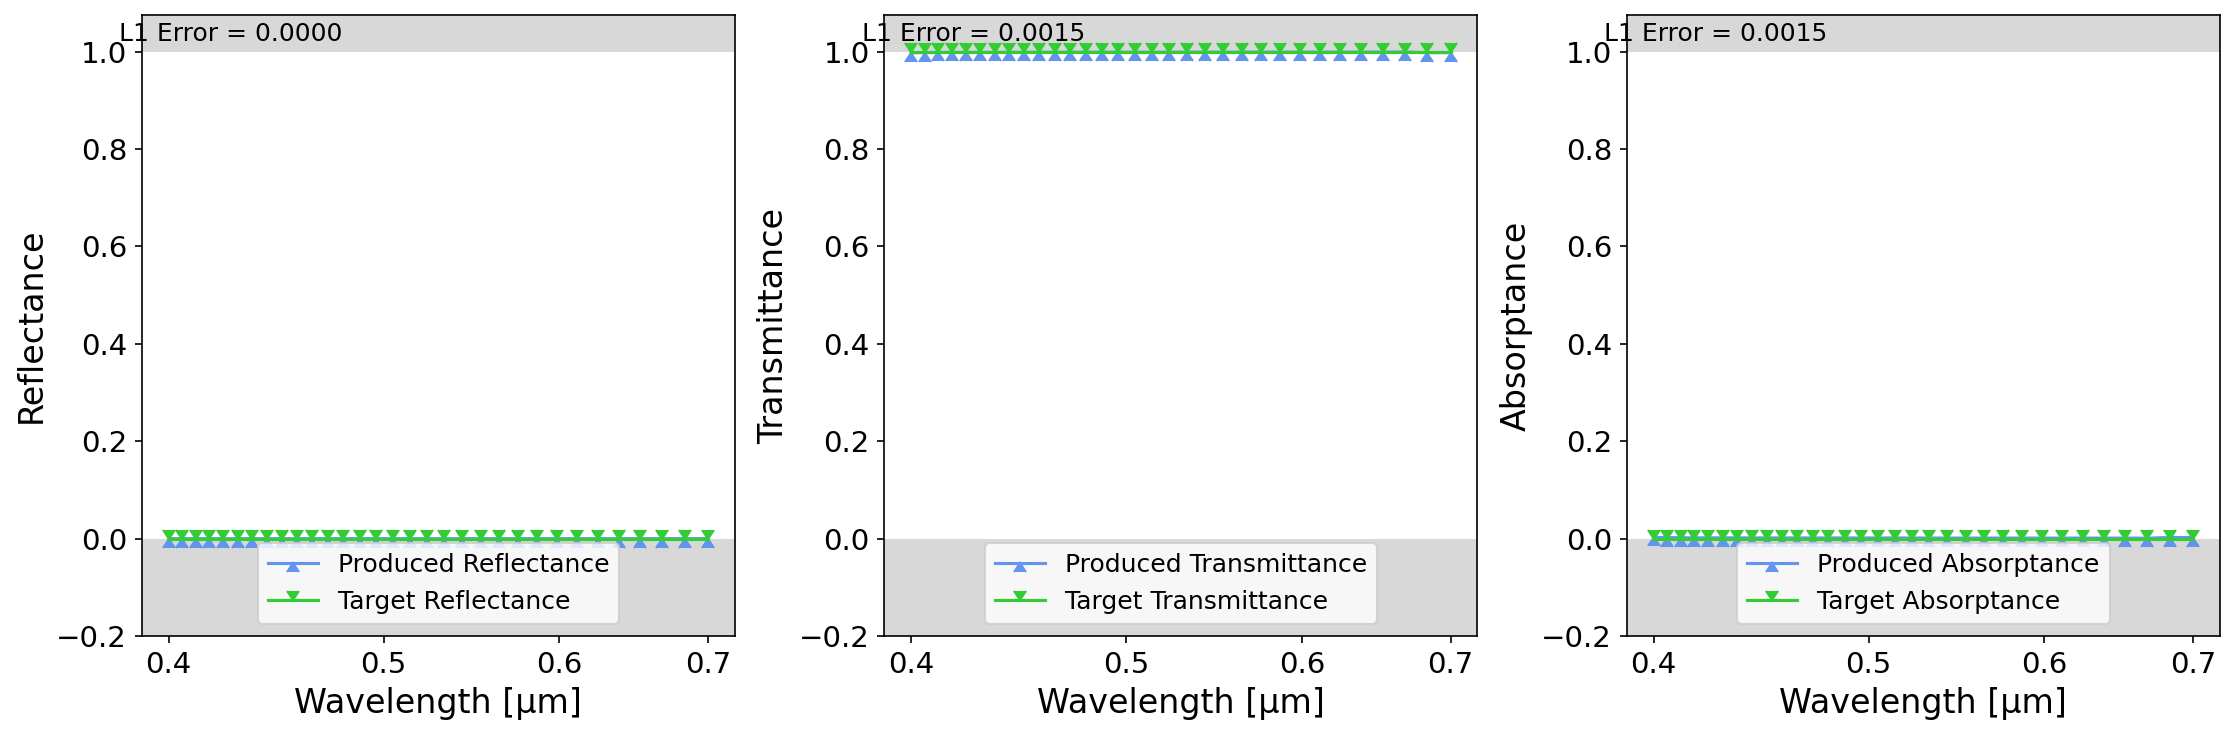

In [6]:
nidn.plot_spectra(cfg)

#### Absolute grid values plot

The complex absolute value of the epsilon over all frequencies is presented here. This plot is in general more useful for patterned multilayers.

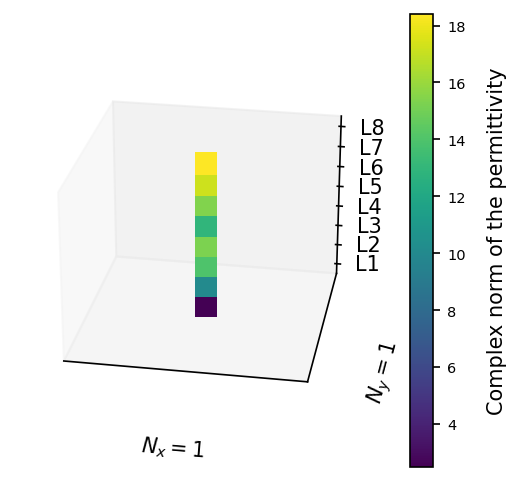

In [7]:
nidn.plot_model_grid(cfg)

#### Epsilon vs frequency and real materials

The following function plots the epsilon values vs. frequency of grid points against real materials in our library. This plot is in general more useful for patterned multilayers.

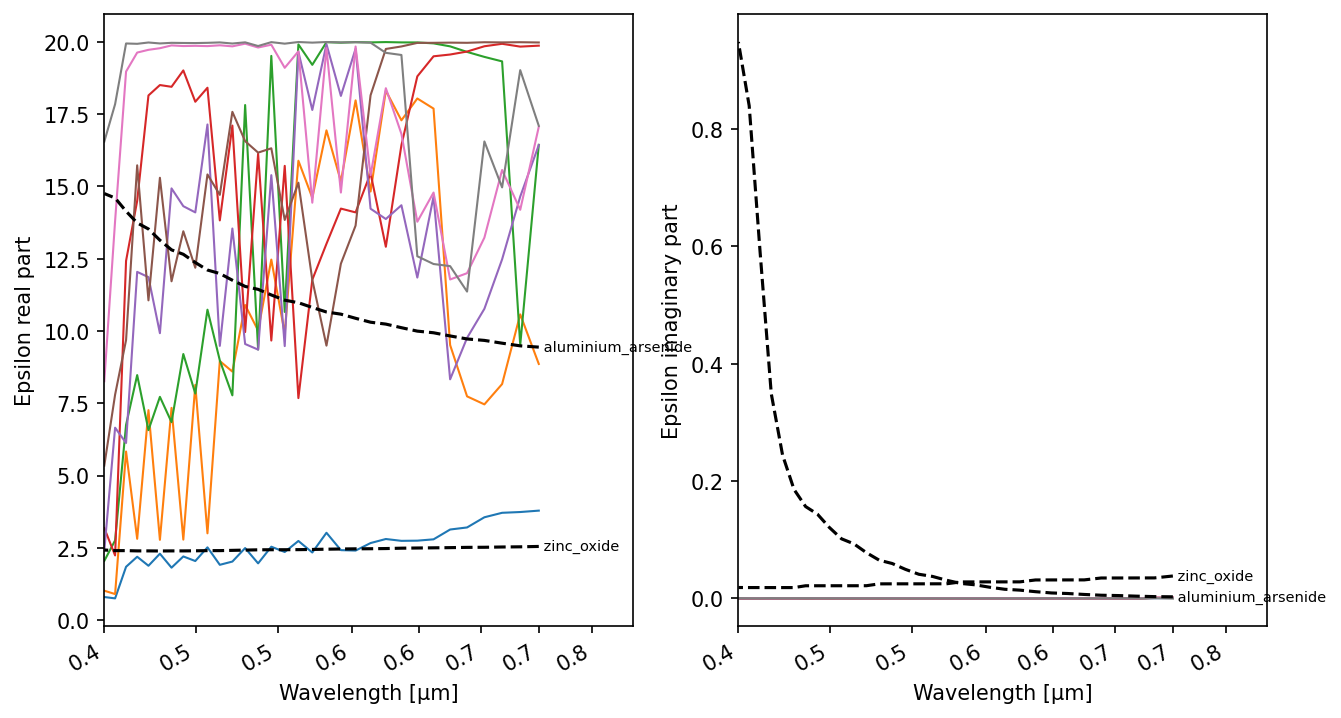

In [8]:
nidn.plot_eps_per_point(cfg,legend=False)

In [12]:
# Create epsilon grid from the model
eps, _ = nidn.model_to_eps_grid(cfg.model, cfg)

# Compute the spectra for the given epsilon values
prod_R_spectrum, prod_T_spectrum = nidn.compute_spectrum(eps, cfg)

In [18]:
import torch
torch.min(torch.tensor(prod_T_spectrum))

tensor(0.9975)

In [19]:
torch.max(torch.tensor(prod_T_spectrum))

tensor(0.9990)

In [20]:
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above
cfg.iterations = 3000 # Set number of training iterations (that is forward model evaluations) to perform

In [21]:
nidn.run_training(cfg);

14:53:52|NIDN-INFO| ###  New Best=0.6310 with SpectrumLoss=0.6264 ### L1=0.6264
14:53:52|NIDN-INFO| It=0     Loss=0.6310   |  weighted_avg=0.6310  |  SpectrumLoss=0.6264 | L1=0.6264
14:53:53|NIDN-INFO| ###  New Best=0.6057 with SpectrumLoss=0.6012 ### L1=0.6012
14:53:54|NIDN-INFO| ###  New Best=0.5894 with SpectrumLoss=0.5850 ### L1=0.5850
14:53:55|NIDN-INFO| ###  New Best=0.5776 with SpectrumLoss=0.5732 ### L1=0.5732
14:53:55|NIDN-INFO| ###  New Best=0.5697 with SpectrumLoss=0.5654 ### L1=0.5654
14:53:56|NIDN-INFO| ###  New Best=0.5641 with SpectrumLoss=0.5601 ### L1=0.5601
14:53:56|NIDN-INFO| It=5     Loss=0.5641   |  weighted_avg=0.5896  |  SpectrumLoss=0.5601 | L1=0.5601
14:53:57|NIDN-INFO| ###  New Best=0.5590 with SpectrumLoss=0.5552 ### L1=0.5552
14:53:58|NIDN-INFO| ###  New Best=0.5546 with SpectrumLoss=0.5509 ### L1=0.5509
14:53:58|NIDN-INFO| ###  New Best=0.5497 with SpectrumLoss=0.5462 ### L1=0.5462
14:53:59|NIDN-INFO| ###  New Best=0.5438 with SpectrumLoss=0.5404 ### L1=0.5

14:54:42|NIDN-INFO| ###  New Best=0.1950 with SpectrumLoss=0.1934 ### L1=0.1934
14:54:42|NIDN-INFO| ###  New Best=0.1942 with SpectrumLoss=0.1926 ### L1=0.1926
14:54:43|NIDN-INFO| ###  New Best=0.1935 with SpectrumLoss=0.1918 ### L1=0.1918
14:54:44|NIDN-INFO| ###  New Best=0.1928 with SpectrumLoss=0.1912 ### L1=0.1912
14:54:44|NIDN-INFO| It=65    Loss=0.1928   |  weighted_avg=0.2038  |  SpectrumLoss=0.1912 | L1=0.1912
14:54:45|NIDN-INFO| ###  New Best=0.1923 with SpectrumLoss=0.1906 ### L1=0.1906
14:54:45|NIDN-INFO| ###  New Best=0.1918 with SpectrumLoss=0.1901 ### L1=0.1901
14:54:46|NIDN-INFO| ###  New Best=0.1913 with SpectrumLoss=0.1896 ### L1=0.1896
14:54:47|NIDN-INFO| ###  New Best=0.1908 with SpectrumLoss=0.1892 ### L1=0.1892
14:54:48|NIDN-INFO| ###  New Best=0.1904 with SpectrumLoss=0.1888 ### L1=0.1888
14:54:48|NIDN-INFO| It=70    Loss=0.1904   |  weighted_avg=0.1975  |  SpectrumLoss=0.1888 | L1=0.1888
14:54:49|NIDN-INFO| ###  New Best=0.1900 with SpectrumLoss=0.1885 ### L1=0.1

14:55:31|NIDN-INFO| ###  New Best=0.1833 with SpectrumLoss=0.1829 ### L1=0.1829
14:55:31|NIDN-INFO| It=125   Loss=0.1833   |  weighted_avg=0.1838  |  SpectrumLoss=0.1829 | L1=0.1829
14:55:32|NIDN-INFO| ###  New Best=0.1833 with SpectrumLoss=0.1829 ### L1=0.1829
14:55:33|NIDN-INFO| ###  New Best=0.1832 with SpectrumLoss=0.1828 ### L1=0.1828
14:55:34|NIDN-INFO| ###  New Best=0.1832 with SpectrumLoss=0.1828 ### L1=0.1828
14:55:34|NIDN-INFO| ###  New Best=0.1832 with SpectrumLoss=0.1827 ### L1=0.1827
14:55:35|NIDN-INFO| ###  New Best=0.1831 with SpectrumLoss=0.1827 ### L1=0.1827
14:55:35|NIDN-INFO| It=130   Loss=0.1831   |  weighted_avg=0.1836  |  SpectrumLoss=0.1827 | L1=0.1827
14:55:36|NIDN-INFO| ###  New Best=0.1831 with SpectrumLoss=0.1826 ### L1=0.1826
14:55:37|NIDN-INFO| ###  New Best=0.1830 with SpectrumLoss=0.1826 ### L1=0.1826
14:55:38|NIDN-INFO| ###  New Best=0.1830 with SpectrumLoss=0.1825 ### L1=0.1825
14:55:38|NIDN-INFO| ###  New Best=0.1829 with SpectrumLoss=0.1825 ### L1=0.1

14:56:22|NIDN-INFO| ###  New Best=0.1726 with SpectrumLoss=0.1714 ### L1=0.1714
14:56:22|NIDN-INFO| ###  New Best=0.1726 with SpectrumLoss=0.1714 ### L1=0.1714
14:56:22|NIDN-INFO| It=190   Loss=0.1726   |  weighted_avg=0.1731  |  SpectrumLoss=0.1714 | L1=0.1714
14:56:23|NIDN-INFO| ###  New Best=0.1726 with SpectrumLoss=0.1713 ### L1=0.1713
14:56:24|NIDN-INFO| ###  New Best=0.1726 with SpectrumLoss=0.1713 ### L1=0.1713
14:56:25|NIDN-INFO| ###  New Best=0.1726 with SpectrumLoss=0.1713 ### L1=0.1713
14:56:26|NIDN-INFO| ###  New Best=0.1725 with SpectrumLoss=0.1712 ### L1=0.1712
14:56:26|NIDN-INFO| ###  New Best=0.1725 with SpectrumLoss=0.1712 ### L1=0.1712
14:56:26|NIDN-INFO| It=195   Loss=0.1725   |  weighted_avg=0.1728  |  SpectrumLoss=0.1712 | L1=0.1712
14:56:27|NIDN-INFO| ###  New Best=0.1725 with SpectrumLoss=0.1711 ### L1=0.1711
14:56:28|NIDN-INFO| ###  New Best=0.1724 with SpectrumLoss=0.1711 ### L1=0.1711
14:56:29|NIDN-INFO| ###  New Best=0.1724 with SpectrumLoss=0.1710 ### L1=0.1

14:57:12|NIDN-INFO| ###  New Best=0.1355 with SpectrumLoss=0.1344 ### L1=0.1344
14:57:13|NIDN-INFO| ###  New Best=0.1352 with SpectrumLoss=0.1341 ### L1=0.1341
14:57:14|NIDN-INFO| ###  New Best=0.1348 with SpectrumLoss=0.1337 ### L1=0.1337
14:57:14|NIDN-INFO| ###  New Best=0.1344 with SpectrumLoss=0.1332 ### L1=0.1332
14:57:15|NIDN-INFO| ###  New Best=0.1336 with SpectrumLoss=0.1324 ### L1=0.1324
14:57:15|NIDN-INFO| It=255   Loss=0.1336   |  weighted_avg=0.1361  |  SpectrumLoss=0.1324 | L1=0.1324
14:57:16|NIDN-INFO| ###  New Best=0.1325 with SpectrumLoss=0.1312 ### L1=0.1312
14:57:17|NIDN-INFO| ###  New Best=0.1302 with SpectrumLoss=0.1288 ### L1=0.1288
14:57:18|NIDN-INFO| ###  New Best=0.1252 with SpectrumLoss=0.1236 ### L1=0.1236
14:57:19|NIDN-INFO| ###  New Best=0.1159 with SpectrumLoss=0.1140 ### L1=0.1140
14:57:20|NIDN-INFO| ###  New Best=0.1078 with SpectrumLoss=0.1062 ### L1=0.1062
14:57:20|NIDN-INFO| It=260   Loss=0.1078   |  weighted_avg=0.1324  |  SpectrumLoss=0.1062 | L1=0.1

14:58:03|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:04|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:04|NIDN-INFO| It=315   Loss=0.0896   |  weighted_avg=0.0898  |  SpectrumLoss=0.0885 | L1=0.0885
14:58:05|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:06|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:06|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:07|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0885 ### L1=0.0885
14:58:08|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0884 ### L1=0.0884
14:58:08|NIDN-INFO| It=320   Loss=0.0896   |  weighted_avg=0.0897  |  SpectrumLoss=0.0884 | L1=0.0884
14:58:09|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0884 ### L1=0.0884
14:58:10|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0884 ### L1=0.0884
14:58:11|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0884 ### L1=0.0

14:58:57|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:58:58|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:58:59|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:00|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:01|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:01|NIDN-INFO| It=380   Loss=0.0892   |  weighted_avg=0.0892  |  SpectrumLoss=0.0881 | L1=0.0881
14:59:02|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:03|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:03|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:04|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:05|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0881 ### L1=0.0881
14:59:05|NIDN-INFO| It=385   Loss=0.0892   |  weighted_avg=0.0892  |  SpectrumLoss=0.0881 | L1=0.0

14:59:56|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
14:59:57|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
14:59:57|NIDN-INFO| It=440   Loss=0.0890   |  weighted_avg=0.0890  |  SpectrumLoss=0.0879 | L1=0.0879
14:59:58|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
14:59:59|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:00|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:01|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:02|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:02|NIDN-INFO| It=445   Loss=0.0890   |  weighted_avg=0.0890  |  SpectrumLoss=0.0879 | L1=0.0879
15:00:03|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:03|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0879
15:00:04|NIDN-INFO| ###  New Best=0.0890 with SpectrumLoss=0.0879 ### L1=0.0

15:00:55|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0878 ### L1=0.0878
15:00:56|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0878 ### L1=0.0878
15:00:56|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:00:58|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:00:59|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:00:59|NIDN-INFO| It=505   Loss=0.0889   |  weighted_avg=0.0889  |  SpectrumLoss=0.0877 | L1=0.0877
15:01:00|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:01:01|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:01:02|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:01:03|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:01:04|NIDN-INFO| ###  New Best=0.0889 with SpectrumLoss=0.0877 ### L1=0.0877
15:01:04|NIDN-INFO| It=510   Loss=0.0889   |  weighted_avg=0.0889  |  SpectrumLoss=0.0877 | L1=0.0

15:01:58|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:01:59|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:01:59|NIDN-INFO| It=565   Loss=0.0888   |  weighted_avg=0.0888  |  SpectrumLoss=0.0876 | L1=0.0876
15:02:00|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:01|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:02|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:03|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:04|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:04|NIDN-INFO| It=570   Loss=0.0888   |  weighted_avg=0.0888  |  SpectrumLoss=0.0876 | L1=0.0876
15:02:05|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:06|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0876
15:02:06|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0876 ### L1=0.0

15:03:01|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:02|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:03|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:04|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:04|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:04|NIDN-INFO| It=630   Loss=0.0888   |  weighted_avg=0.0888  |  SpectrumLoss=0.0875 | L1=0.0875
15:03:05|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:06|NIDN-INFO| ###  New Best=0.0888 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:08|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:09|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:10|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:03:10|NIDN-INFO| It=635   Loss=0.0887   |  weighted_avg=0.0888  |  SpectrumLoss=0.0875 | L1=0.0

15:04:01|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:02|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:02|NIDN-INFO| It=690   Loss=0.0887   |  weighted_avg=0.0887  |  SpectrumLoss=0.0875 | L1=0.0875
15:04:04|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:05|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:06|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:07|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:07|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:07|NIDN-INFO| It=695   Loss=0.0887   |  weighted_avg=0.0887  |  SpectrumLoss=0.0875 | L1=0.0875
15:04:08|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:09|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0875
15:04:10|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0875 ### L1=0.0

15:05:00|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:01|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:02|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:03|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:04|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:04|NIDN-INFO| It=755   Loss=0.0887   |  weighted_avg=0.0887  |  SpectrumLoss=0.0874 | L1=0.0874
15:05:05|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:06|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:07|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:08|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:09|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
15:05:09|NIDN-INFO| It=760   Loss=0.0887   |  weighted_avg=0.0887  |  SpectrumLoss=0.0874 | L1=0.0

15:06:00|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:01|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:01|NIDN-INFO| It=815   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0874 | L1=0.0874
15:06:02|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:03|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:04|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:05|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:06|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:06|NIDN-INFO| It=820   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0874 | L1=0.0874
15:06:07|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:08|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:08|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0

15:06:58|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:59|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:06:59|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:00|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:01|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:01|NIDN-INFO| It=880   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0874 | L1=0.0874
15:07:02|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:03|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:04|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:05|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:06|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:06|NIDN-INFO| It=885   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0874 | L1=0.0

15:07:56|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0874 ### L1=0.0874
15:07:56|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:07:56|NIDN-INFO| It=940   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:07:57|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:07:58|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:07:59|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:00|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:01|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:01|NIDN-INFO| It=945   Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:08:02|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:03|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:04|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0

15:08:53|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:53|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:54|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:55|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:56|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:56|NIDN-INFO| It=1005  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:08:57|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:58|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:58|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:08:59|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:00|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:00|NIDN-INFO| It=1010  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0

15:09:45|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:46|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:46|NIDN-INFO| It=1065  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:09:47|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:47|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:48|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:49|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:50|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:50|NIDN-INFO| It=1070  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:09:51|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:51|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:09:52|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0

15:10:36|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:37|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:37|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:38|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:39|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:39|NIDN-INFO| It=1130  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0873
15:10:40|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:41|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:42|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:42|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:43|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0873 ### L1=0.0873
15:10:43|NIDN-INFO| It=1135  Loss=0.0886   |  weighted_avg=0.0886  |  SpectrumLoss=0.0873 | L1=0.0

15:11:28|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:28|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:28|NIDN-INFO| It=1190  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:11:29|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:30|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:31|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:32|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:33|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:33|NIDN-INFO| It=1195  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:11:33|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:34|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:11:35|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0

15:12:19|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:19|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:20|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:21|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:22|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:22|NIDN-INFO| It=1255  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:12:23|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:24|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:24|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:25|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:26|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:12:26|NIDN-INFO| It=1260  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0

15:13:10|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:11|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:11|NIDN-INFO| It=1315  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:13:12|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:13|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:14|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:15|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:15|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:15|NIDN-INFO| It=1320  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:13:16|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:17|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:13:18|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0

15:14:02|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:02|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:03|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:04|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:05|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:05|NIDN-INFO| It=1380  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:14:06|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:07|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:07|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:08|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:09|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:09|NIDN-INFO| It=1385  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0

15:14:53|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:54|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:54|NIDN-INFO| It=1440  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:14:55|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:56|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:57|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:58|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:58|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:14:58|NIDN-INFO| It=1445  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0873 | L1=0.0873
15:14:59|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:15:00|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0873
15:15:01|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0873 ### L1=0.0

15:15:44|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:45|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:46|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:47|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:48|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:48|NIDN-INFO| It=1505  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:15:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:51|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:52|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:15:52|NIDN-INFO| It=1510  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:16:36|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:37|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:37|NIDN-INFO| It=1565  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:16:38|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:38|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:39|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:40|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:41|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:41|NIDN-INFO| It=1570  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:16:42|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:43|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:16:43|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0

15:17:27|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:28|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:29|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:30|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:31|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:31|NIDN-INFO| It=1630  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:17:31|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:32|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:33|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:34|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:35|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:17:35|NIDN-INFO| It=1635  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:18:20|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:20|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:20|NIDN-INFO| It=1690  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:18:21|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:22|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:23|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:24|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:25|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:25|NIDN-INFO| It=1695  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:18:25|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:26|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:18:27|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0

15:19:11|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:11|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:12|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:13|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:14|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:14|NIDN-INFO| It=1755  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:19:15|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:16|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:16|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:17|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:18|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:19:18|NIDN-INFO| It=1760  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:20:02|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:03|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:03|NIDN-INFO| It=1815  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:20:04|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:05|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:06|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:07|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:07|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:07|NIDN-INFO| It=1820  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:20:08|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:09|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:10|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0

15:20:54|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:54|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:55|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:56|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:57|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:57|NIDN-INFO| It=1880  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:20:58|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:59|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:20:59|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:00|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:01|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:01|NIDN-INFO| It=1885  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:21:46|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:46|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:46|NIDN-INFO| It=1940  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:21:47|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:48|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:50|NIDN-INFO| It=1945  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:21:51|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:52|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:21:53|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0

15:22:42|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:43|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:44|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:46|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:47|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:47|NIDN-INFO| It=2005  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:22:48|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:51|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:52|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:22:52|NIDN-INFO| It=2010  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:23:46|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:47|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:47|NIDN-INFO| It=2065  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:23:48|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:51|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:52|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:52|NIDN-INFO| It=2070  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:23:53|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:54|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:23:55|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0

15:24:47|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:48|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:49|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:50|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:51|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:51|NIDN-INFO| It=2130  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0872
15:24:52|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:53|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:54|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:55|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:56|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0872 ### L1=0.0872
15:24:56|NIDN-INFO| It=2135  Loss=0.0885   |  weighted_avg=0.0885  |  SpectrumLoss=0.0872 | L1=0.0

15:25:40|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:41|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:41|NIDN-INFO| It=2190  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0872
15:25:41|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:42|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:43|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:44|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:44|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:44|NIDN-INFO| It=2195  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0872
15:25:45|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:46|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:25:47|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0

15:26:31|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:31|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:32|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:33|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:33|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:33|NIDN-INFO| It=2255  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0872
15:26:34|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:35|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:35|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:36|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:37|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:26:37|NIDN-INFO| It=2260  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0

15:27:14|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:15|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:15|NIDN-INFO| It=2315  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0872
15:27:15|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:16|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:17|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:17|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:18|NIDN-INFO| It=2320  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0872 | L1=0.0872
15:27:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:19|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0872
15:27:20|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0872 ### L1=0.0

15:27:55|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:56|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:57|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:57|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:58|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:58|NIDN-INFO| It=2380  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:27:59|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:27:59|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:00|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:01|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:02|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:02|NIDN-INFO| It=2385  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0

15:28:38|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:39|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:39|NIDN-INFO| It=2440  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:28:39|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:40|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:41|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:41|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:42|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:42|NIDN-INFO| It=2445  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:28:43|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:43|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:28:44|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0

15:29:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:19|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:19|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:20|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:20|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:20|NIDN-INFO| It=2505  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:29:21|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:22|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:22|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:23|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:24|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:29:24|NIDN-INFO| It=2510  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0

15:30:02|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:03|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:03|NIDN-INFO| It=2565  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:30:04|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:04|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:05|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:06|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:07|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:07|NIDN-INFO| It=2570  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:30:08|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:09|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:10|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0

15:30:57|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:58|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:30:59|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:00|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:01|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:01|NIDN-INFO| It=2630  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:31:02|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:03|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:04|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:05|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:06|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:06|NIDN-INFO| It=2635  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0

15:31:56|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:57|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:57|NIDN-INFO| It=2690  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:31:58|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:31:59|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:00|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:01|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:02|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:02|NIDN-INFO| It=2695  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:32:03|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:04|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:32:05|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0

15:33:02|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:03|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:04|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:05|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:06|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:06|NIDN-INFO| It=2755  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:33:07|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:08|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:09|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:10|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:12|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:33:12|NIDN-INFO| It=2760  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0

15:34:07|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:08|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:08|NIDN-INFO| It=2815  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:34:09|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:11|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:12|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:13|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:14|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:14|NIDN-INFO| It=2820  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:34:15|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:16|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:34:17|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0

15:35:11|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:12|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:13|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:14|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:15|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:15|NIDN-INFO| It=2880  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:35:16|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:17|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:19|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:20|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:35:20|NIDN-INFO| It=2885  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0

15:36:13|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:14|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:14|NIDN-INFO| It=2940  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:36:15|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:16|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:17|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:18|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:18|NIDN-INFO| It=2945  Loss=0.0884   |  weighted_avg=0.0884  |  SpectrumLoss=0.0871 | L1=0.0871
15:36:19|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:20|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0871
15:36:22|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0871 ### L1=0.0

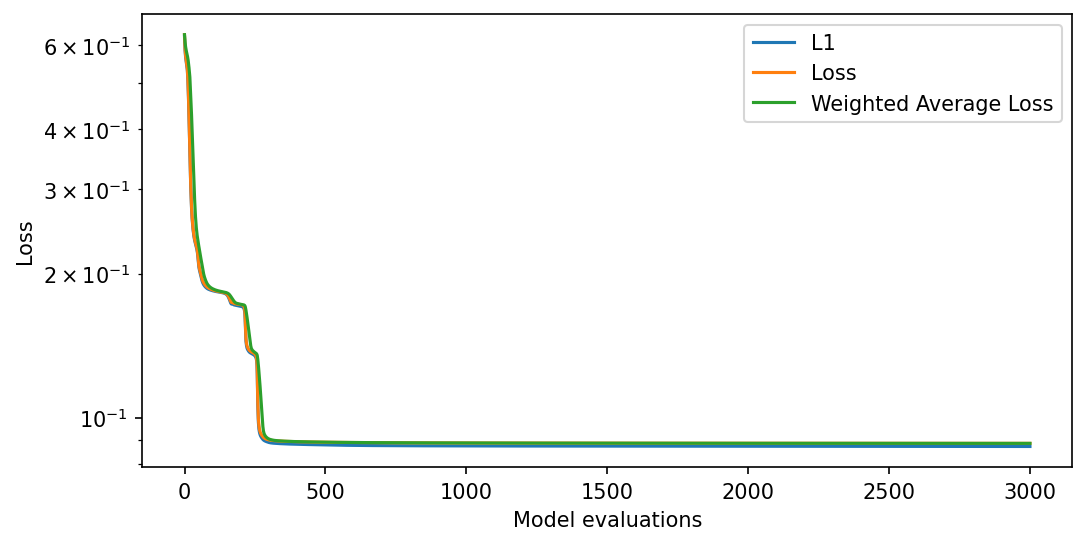

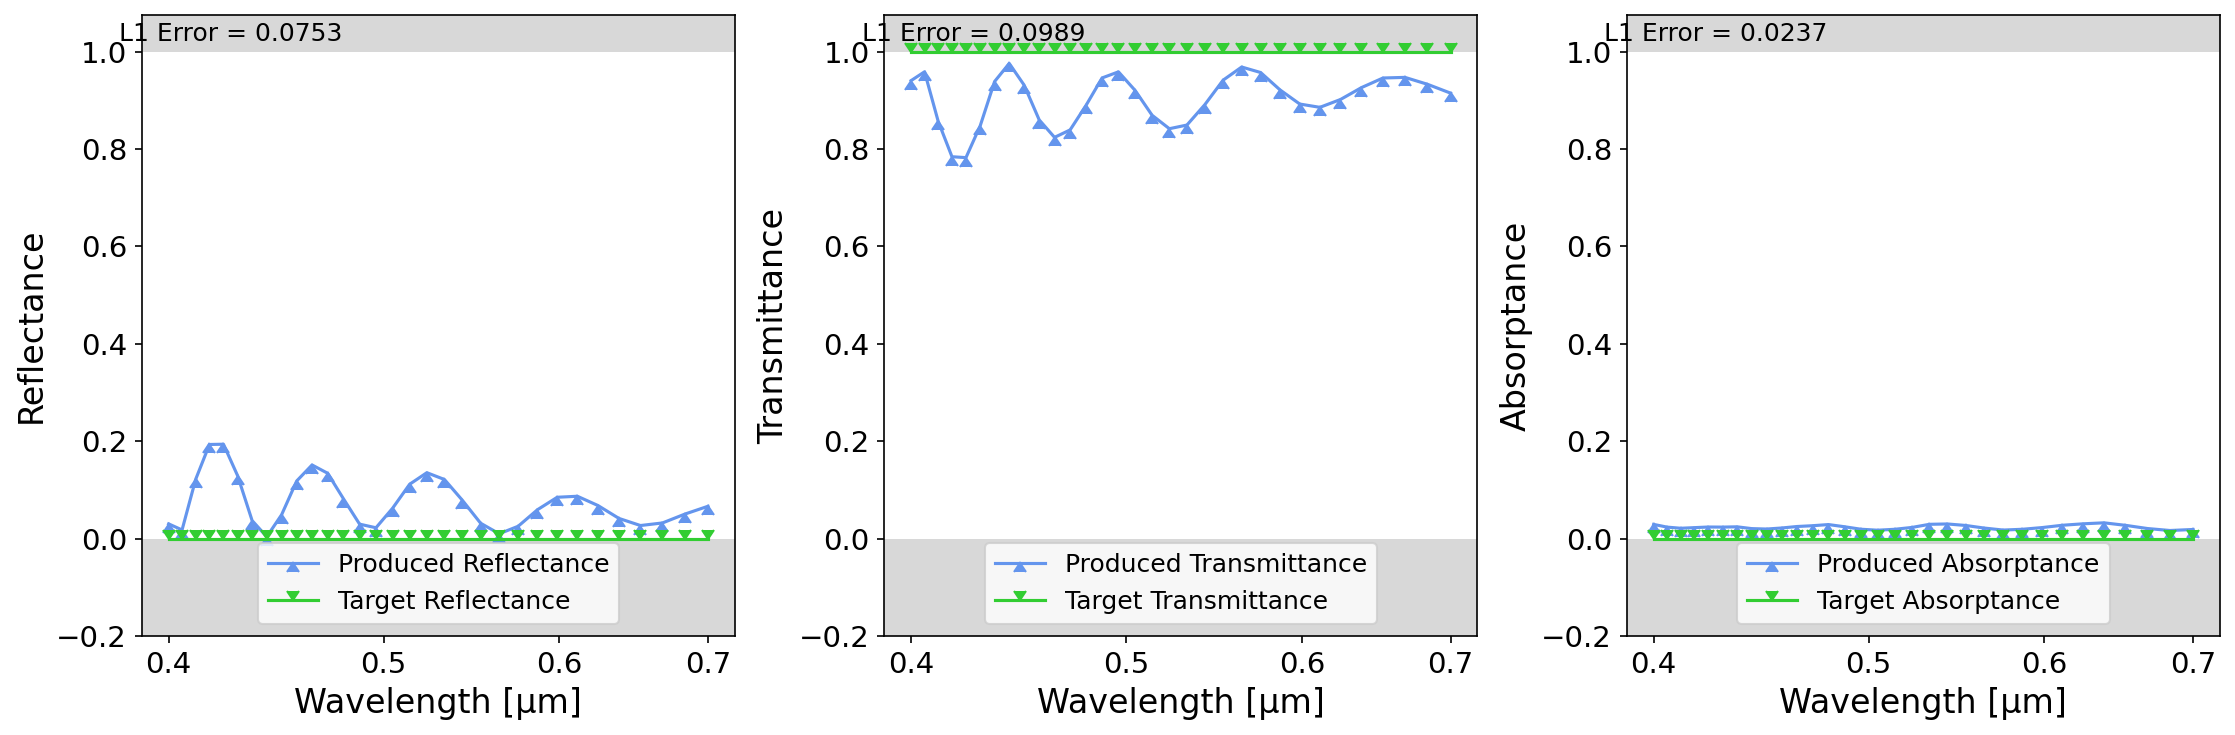

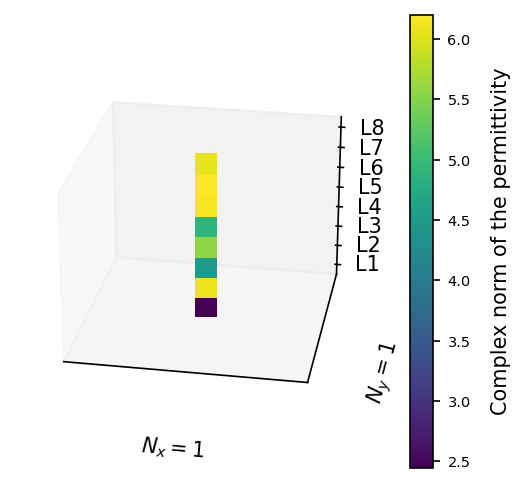

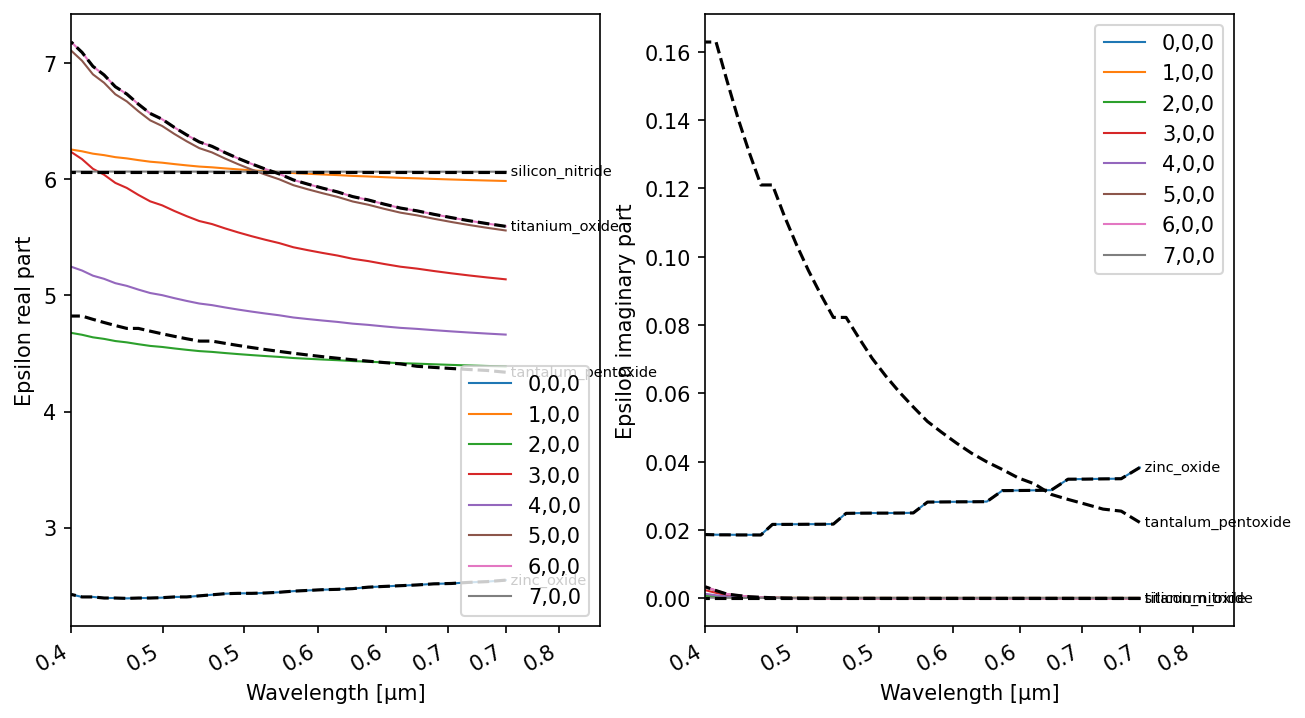

In [22]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg)

In [23]:
# Create epsilon grid from the model
eps, _ = nidn.model_to_eps_grid(cfg.model, cfg)

# Compute the spectra for the given epsilon values
prod_R_spectrum, prod_T_spectrum = nidn.compute_spectrum(eps, cfg)

In [24]:
torch.min(torch.tensor(prod_T_spectrum))

tensor(0.7822)

In [25]:
torch.max(torch.tensor(prod_T_spectrum))

tensor(0.9756)

In [26]:
torch.mean(torch.tensor(prod_T_spectrum))

tensor(0.9011)